<a href="https://colab.research.google.com/github/EngOmarElsayed/HeartDiseaseNoteBook/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Needed library

In [1]:
## Import Librarys
import tensorflow as tf
print("tf version: ", tf.version.VERSION)

tf version:  2.15.0


In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load DataSet

In [111]:
dataSet = pd.read_csv("../content/heart_statlog_cleveland_hungary_final.csv")
dataSet.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Now after loading the data our goal is to analyze the data to make sure it's ready and prepared for analysis (Feature engineering) and traning. From that we will know which problems we have in the dataset and needs to be tackled.

In [50]:
# @title Checking the dataType of the dataSet
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [67]:
# @title Checking for null value in dataSet
dataSet.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

### Checking Data for problems (empty value, etc)

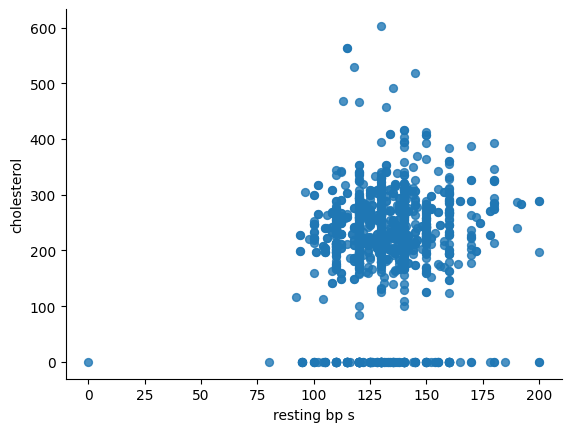

In [8]:
# @title resting bp s vs cholesterol
dataSet.plot(kind='scatter', x='resting bp s', y='cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

From The graph we can see that there is zero values in the cholesterol & resting bp which is not possible. This is one of the problems to be tackled in the data preparation. To make sure let's plot every colum indpendently.

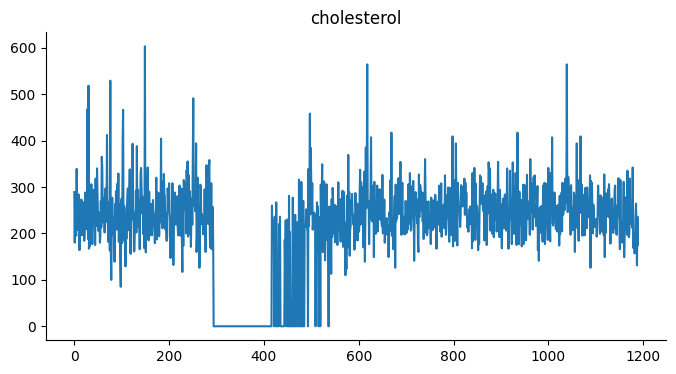

In [9]:
# @title cholesterol
dataSet['cholesterol'].plot(kind='line', figsize=(8, 4), title='cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

As you see from the graph we found zero value in the `cholesterol` which doesn't make sense because this means that you are died 😅. This is an issue to fix.

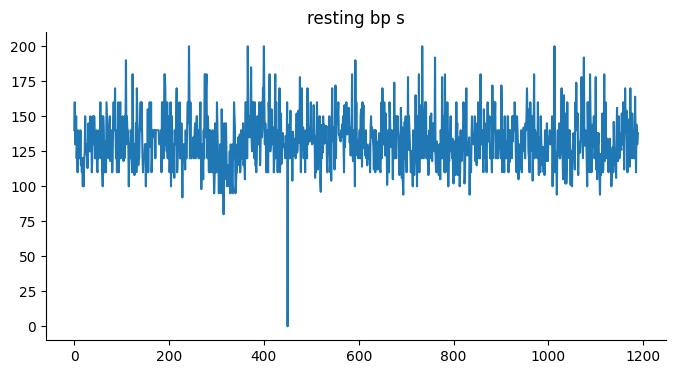

In [10]:
# @title resting bp s
dataSet['resting bp s'].plot(kind='line', figsize=(8, 4), title='resting bp s')
plt.gca().spines[['top', 'right']].set_visible(False)

As you see from the graph we found zero value in the `resting bp s` which doesn't make sense because this means that you are died 😅. But to make sure let's see the plot in the histo graph.

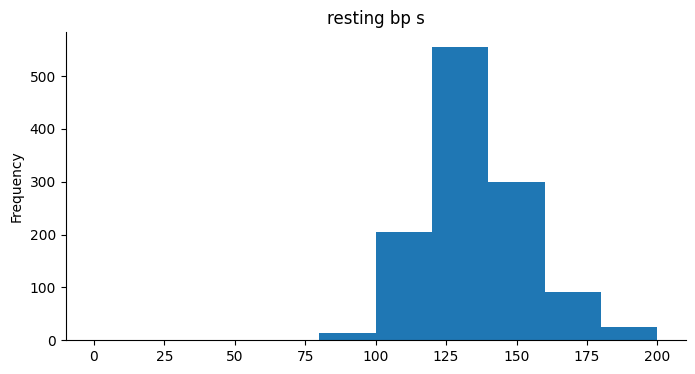

In [113]:
dataSet['resting bp s'].plot(kind='hist', figsize=(8, 4), title='resting bp s')
plt.gca().spines[['top', 'right']].set_visible(False)

After seeing the histogram graph there doesn't look like there are any zero values in the `resting bp s` colume.
The vertical drop in the previuos graph that nearly reaches zero is likely due to an error or anomaly in the data collection or recording process.

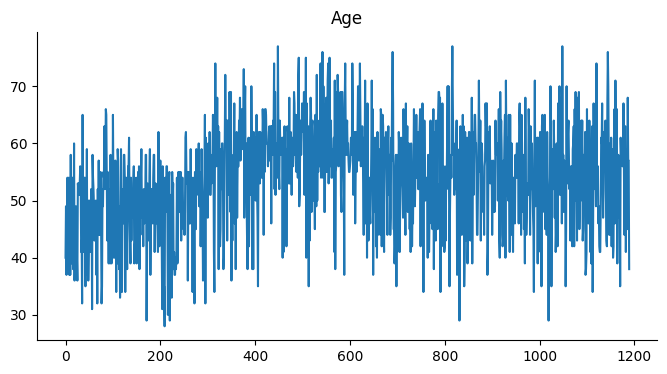

In [17]:
# @title Age
dataSet['age'].plot(kind="line", figsize=(8, 4), title= "Age")
plt.gca().spines[['top', 'right']].set_visible(False)

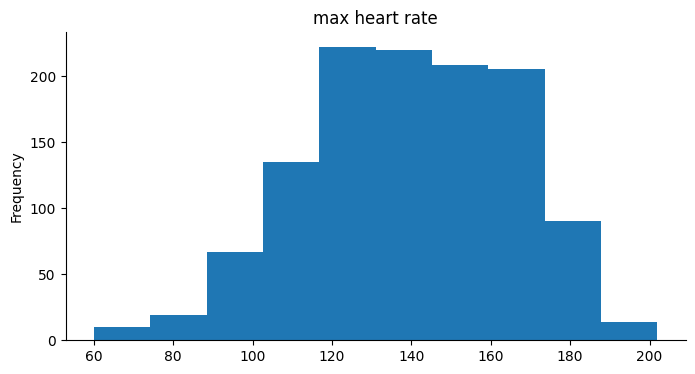

In [75]:
# @title max heart rate
dataSet['max heart rate'].plot(kind="hist", figsize=(8, 4), title= "max heart rate")
plt.gca().spines[['top', 'right']].set_visible(False)

After analyzing the `max heart rate` column, we found that there are outliers. From the documentation of the dataset, the range of values should be from 71-202. We found values below 71. This could be because of an error during data collection or an error in the documentation range. So, we will tackle this as an error during data collection. By doing that, we will replace values below 71 with the minimum value, 71.

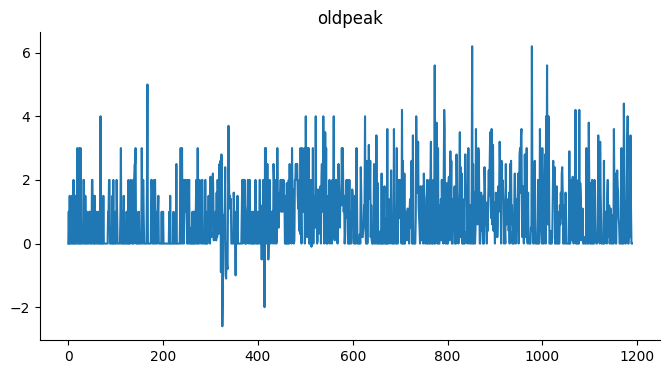

In [20]:
# @title oldPeak
dataSet['oldpeak'].plot(kind="line", figsize=(8, 4), title= "oldpeak")
plt.gca().spines[['top', 'right']].set_visible(False)

As you can see we can spot outliers, there are some couple of values under zero. but due to lack of documentation we don't know if this should be as it is or not. SO we are going to leave it as it is.

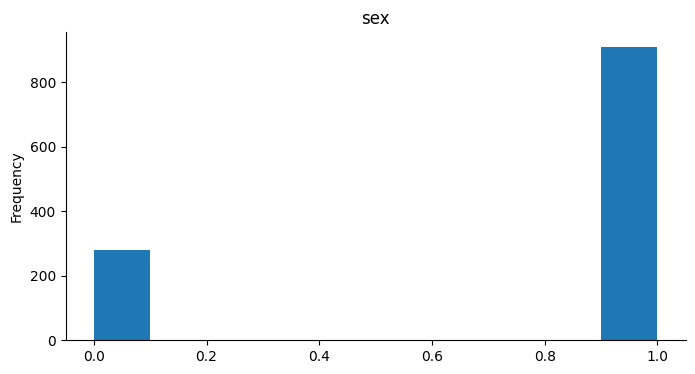

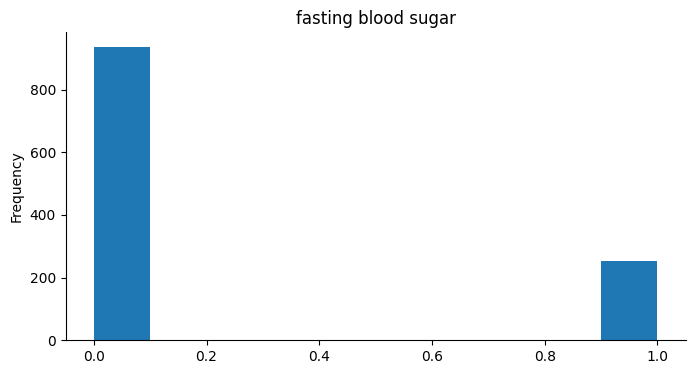

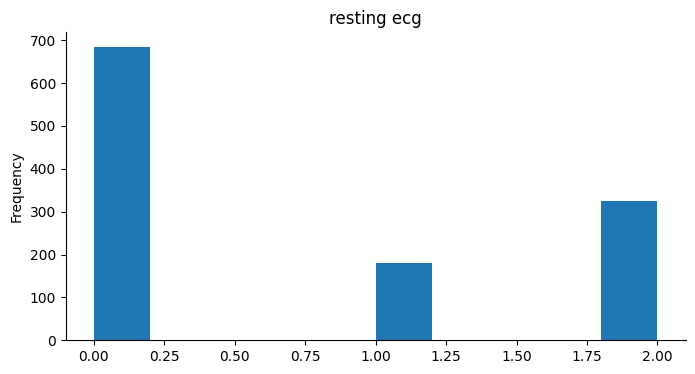

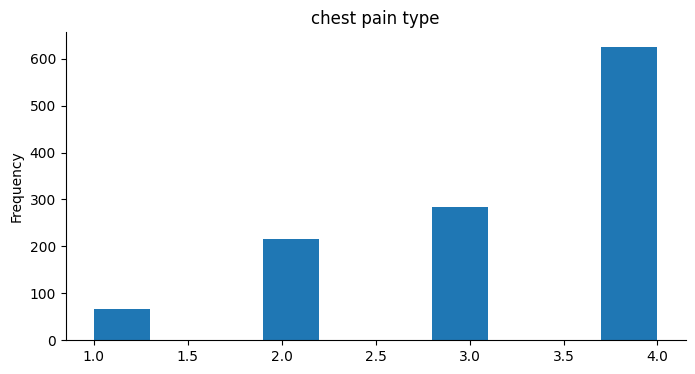

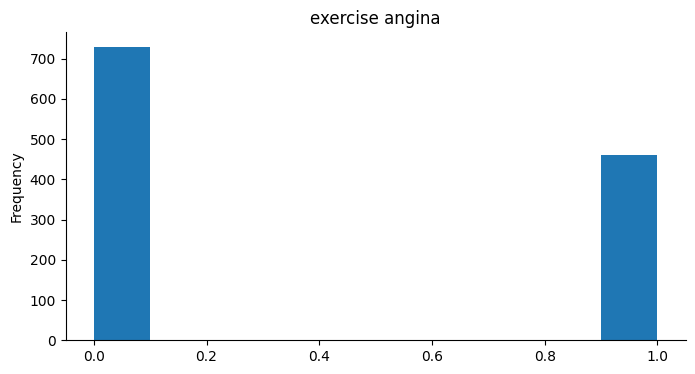

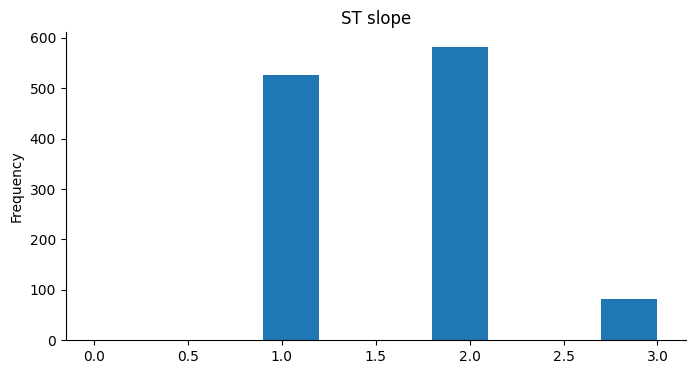

In [66]:
# @title sex & fasting blood sugar & resting ecg

dataSet['sex'].plot(kind="hist", figsize=(8, 4), title= "sex")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['fasting blood sugar'].plot(kind="hist", figsize=(8, 4), title= "fasting blood sugar")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['resting ecg'].plot(kind="hist", figsize=(8, 4), title= "resting ecg")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['chest pain type'].plot(kind="hist", figsize=(8, 4), title= "chest pain type")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['exercise angina'].plot(kind="hist", figsize=(8, 4), title= "exercise angina")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

dataSet['ST slope'].plot(kind="hist", figsize=(8, 4), title= "ST slope")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


## Data Preparation

Now after finishing the analysis of the data we will tackle the issues we found with the data:


1.   Outliare in the `max heart rate` colume
3.   Zero value in the `cholesterol` colume





# First issue
To remove the values less than 71 and replace them with minumim value which is 71 in the `max heart rate`.

In [84]:
modified_data = [value if value >= 71 else 71 for value in dataSet['max heart rate']]
dataSet['max heart rate'] = modified_data

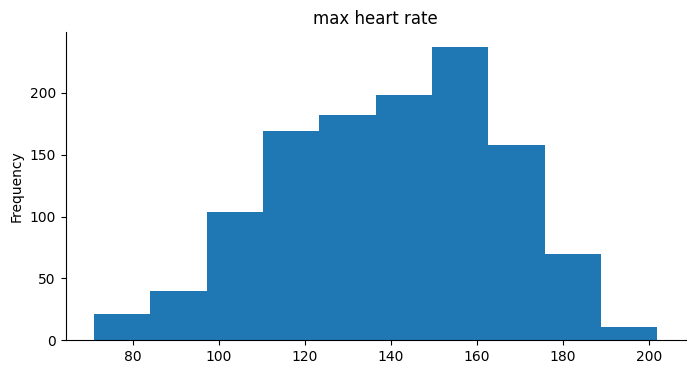

In [85]:
dataSet['max heart rate'].plot(kind="hist", figsize=(8, 4), title= "max heart rate")
plt.gca().spines[['top', 'right']].set_visible(False)

# Second issue
To remove the Zero values from the `cholesterol` and replace it with the mean.

In [115]:
# first let's get the mean value of the 'resting bp s'
mean = dataSet['cholesterol'].mean()
print(mean)

210.36386554621848


In [116]:
# Replacing the zero values with the mean
modified_data = [value if value > 0 else mean for value in dataSet['cholesterol']]
dataSet['cholesterol'] = modified_data

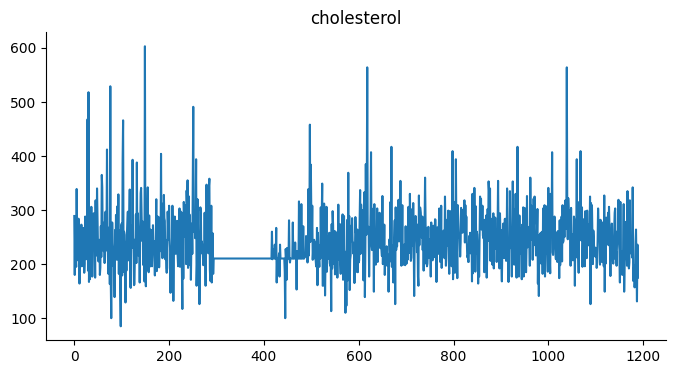

In [117]:
dataSet['cholesterol'].plot(kind="line", figsize=(8, 4), title= "cholesterol")
plt.gca().spines[['top', 'right']].set_visible(False)

Now we have cleaned our data and solved all the problems related to it. Now comes the fun part analysis.

In [118]:
dataSet.to_csv("../content/cleaned_heart_statlog_cleveland_hungary_final.csv")